In [83]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV




In [84]:
#calling glass csv file
gl=pd.read_csv('https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv')

In [85]:
gl

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#This dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes variance of Vina Spiehler.
Here there are 214 observations in the dataset. 
The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7) target variant, which contain two catagories so it is a 'classification problem',
where we need to preidct the type of glasses using classification model

In [86]:
gl.head(15)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


#the first 15 rows and columns of the dataset

In [87]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Here we can see that there are 9 float64 and 2 int64 dtype.
There are no null values.Range and total count of columns.

In [88]:
gl.columns.tolist()

['Id number',
 'RI',
 'Na',
 'Mg',
 'Al',
 'Si',
 'K',
 'Ca',
 'Ba',
 'Fe',
 'Type of glass']

This are the name of the columns.

In [89]:
gl.shape

(214, 11)

Total no of columns are 11 and 214 rows.

In [90]:
gl['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

This are the 6 types of glass present in the dataset. type 2 and 1 are highest in count and type 6 is least.

In [91]:
gl.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

this shows there is no null values

In [92]:
gl.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Now that we have got a glimpse of the dataset, we know that it doesn't have any null values and all the attributes are numerical. Please note there is no order among the classes.
The mean value is greater than median(50%) in most of the columns, which means data is skewed to the right. There is difference between the max and 75% so there are outliers present in the data. The standard deviation,25% percentile value and min can be notice by this describe method.

In [93]:
gl.nunique().to_frame('No of unique values')

,No of unique values
Id number,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


This are the unique values of the dataset.

# visualization

<Axes: >

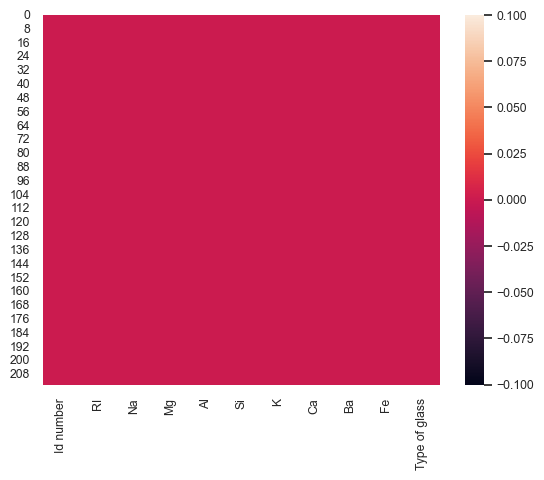

In [94]:
sns.heatmap(gl.isnull())

This shows the visulization of the no null values through heatmap.

Text(0.5, 1.0, 'Count of Glass Types')

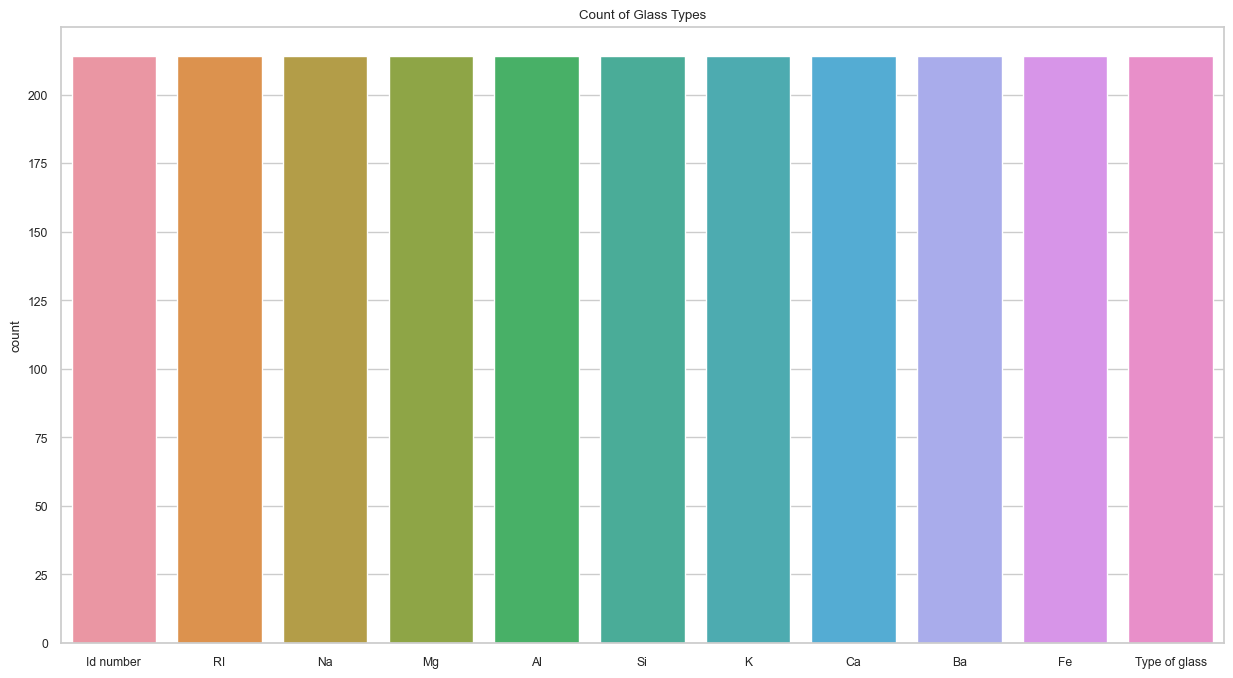

In [95]:
sns.set(style="whitegrid", font_scale=0.8)
plt.subplots(figsize = (15,8))
sns.countplot(data=gl).set_title('Count of Glass Types')

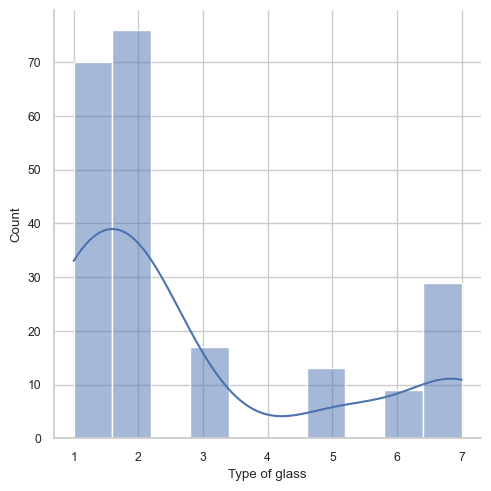

In [96]:
#type of glass
sns.displot(gl['Type of glass'],bins=10,kde=True)

This shows the density of the type of glass. Type 1 and 2 are highest.

In [97]:
# Checked both mean and median. 
gl.corr()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


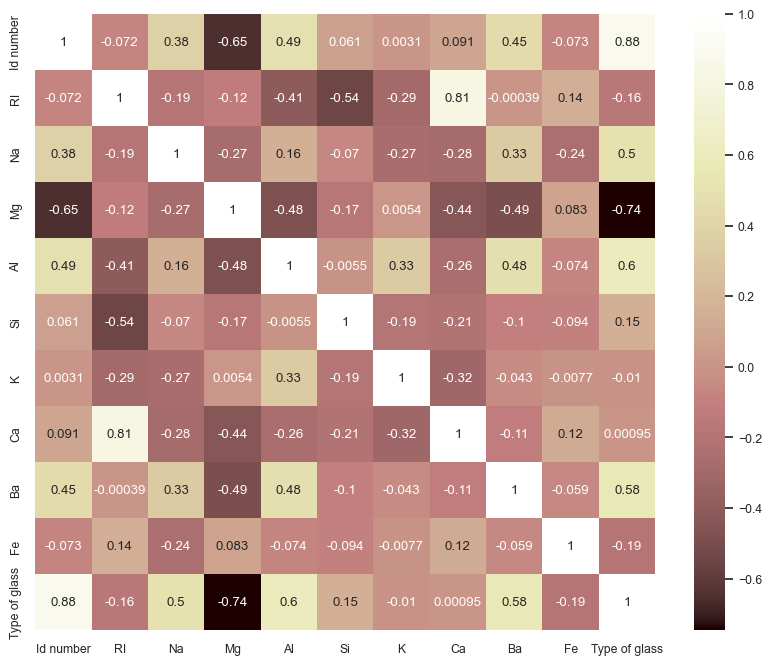

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(gl.corr(),cmap='pink',annot=True)
plt.show()

This shows the correlation with type of glass. Mg is negatively correlated with glass type.Na is correlated with type of glass.

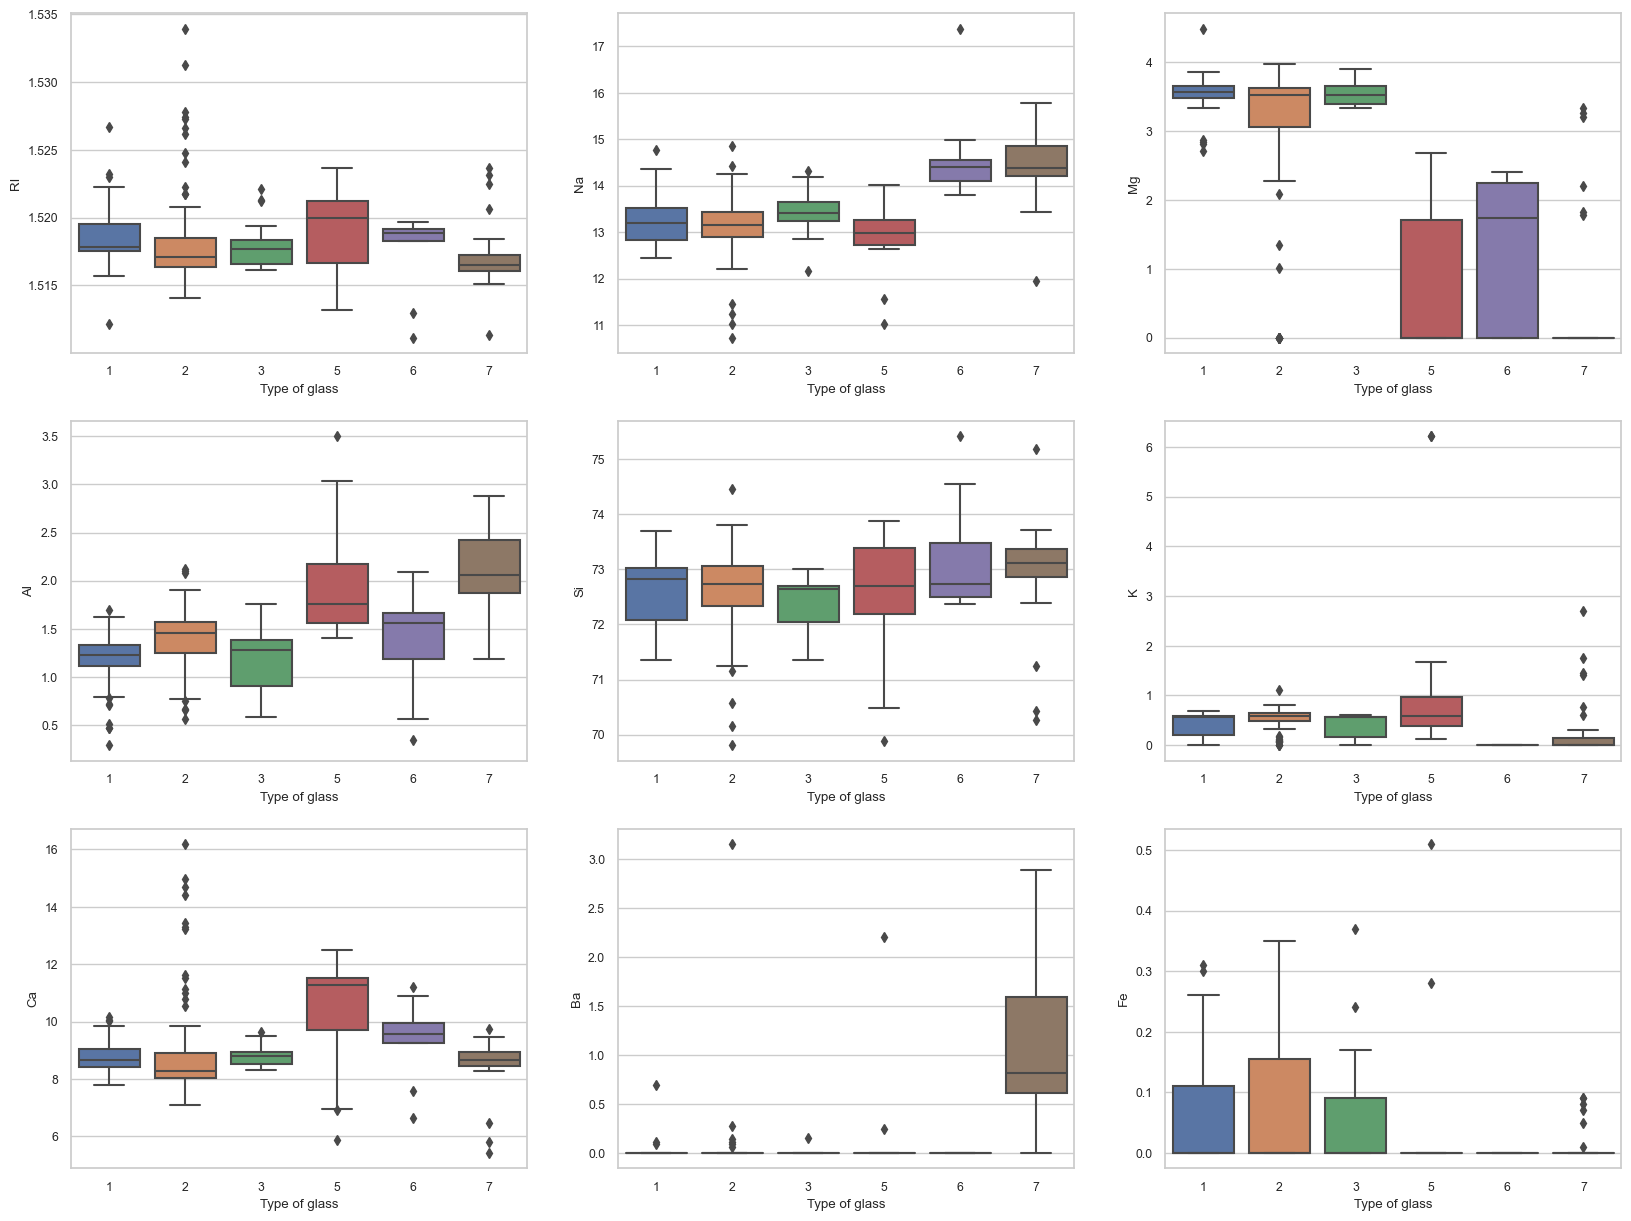

In [99]:
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type of glass',y='RI',data=gl)
plt.subplot(3,3,2)
sns.boxplot(x='Type of glass',y='Na',data=gl)
plt.subplot(3,3,3)
sns.boxplot(x='Type of glass',y='Mg',data=gl)
plt.subplot(3,3,4)
sns.boxplot(x='Type of glass',y='Al',data=gl)
plt.subplot(3,3,5)
sns.boxplot(x='Type of glass',y='Si',data=gl)
plt.subplot(3,3,6)
sns.boxplot(x='Type of glass',y='K',data=gl)
plt.subplot(3,3,7)
sns.boxplot(x='Type of glass',y='Ca',data=gl)
plt.subplot(3,3,8)
sns.boxplot(x='Type of glass',y='Ba',data=gl)
plt.subplot(3,3,9)
sns.boxplot(x='Type of glass',y='Fe',data=gl)
plt.show()

Type 5 has a wider range and slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. But it's higher in type 5. Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration.

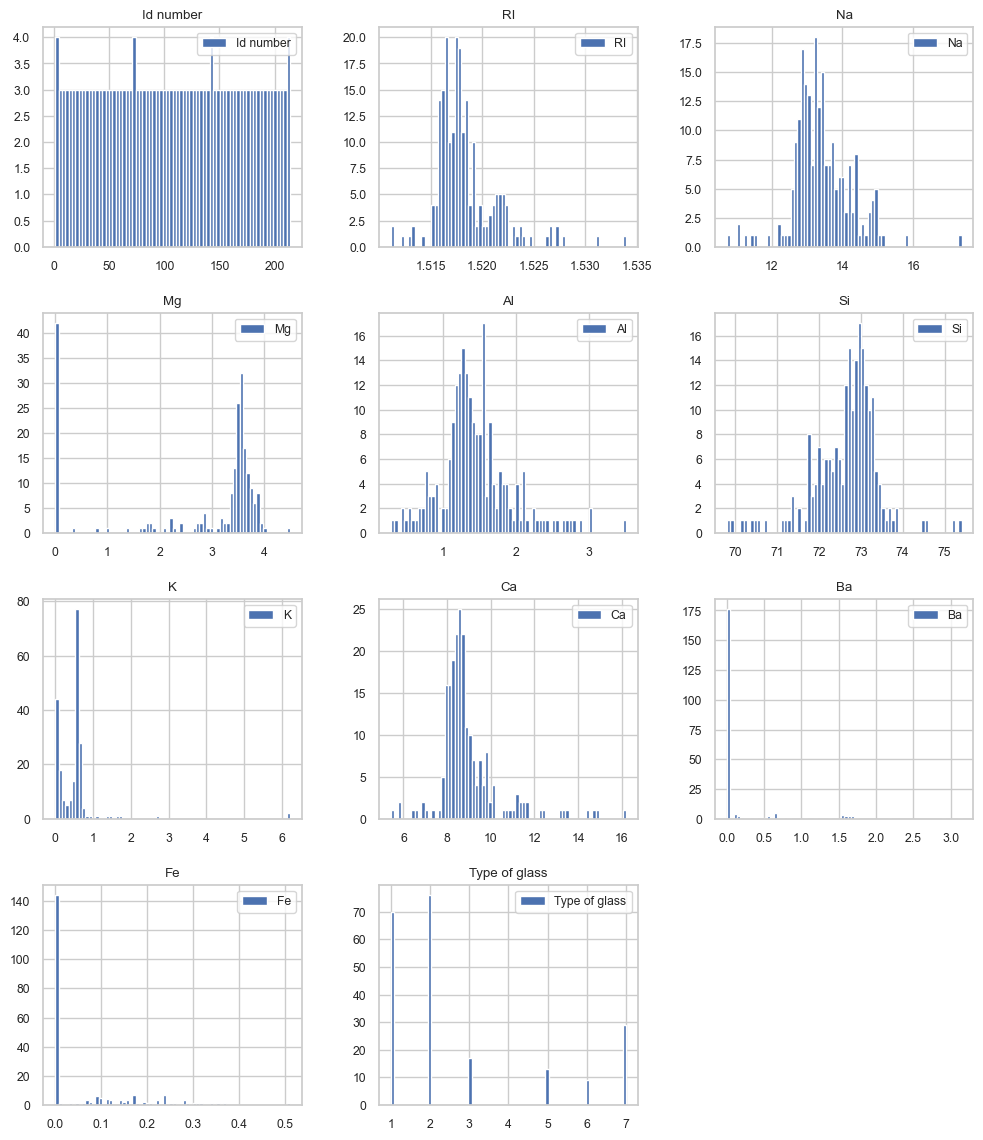

In [100]:
gl.hist(bins=70, figsize=(12,14),legend=True)
plt.show()


This shows the distribution of the minerals through histplot.

<Axes: >

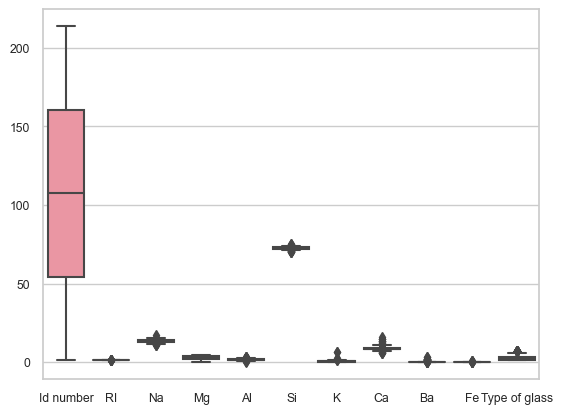

In [101]:
#dropping of duplicates values
gl.drop_duplicates(inplace=True)
sns.boxplot(gl)

In [102]:
gl

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


checking the data after dropping duplicat values.
As it can be seen that there is no change in the rows and columns that means there is no duplicate values.

Id number           Axes(0.125,0.786098;0.227941x0.0939024)
RI               Axes(0.398529,0.786098;0.227941x0.0939024)
Na               Axes(0.672059,0.786098;0.227941x0.0939024)
Mg                  Axes(0.125,0.673415;0.227941x0.0939024)
Al               Axes(0.398529,0.673415;0.227941x0.0939024)
Si               Axes(0.672059,0.673415;0.227941x0.0939024)
K                   Axes(0.125,0.560732;0.227941x0.0939024)
Ca               Axes(0.398529,0.560732;0.227941x0.0939024)
Ba               Axes(0.672059,0.560732;0.227941x0.0939024)
Fe                  Axes(0.125,0.448049;0.227941x0.0939024)
Type of glass    Axes(0.398529,0.448049;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

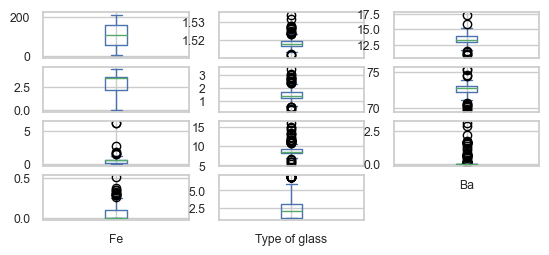

In [103]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
gl.plot(kind='box',subplots=True,layout=(7,3))

we can see the presence of outliers.

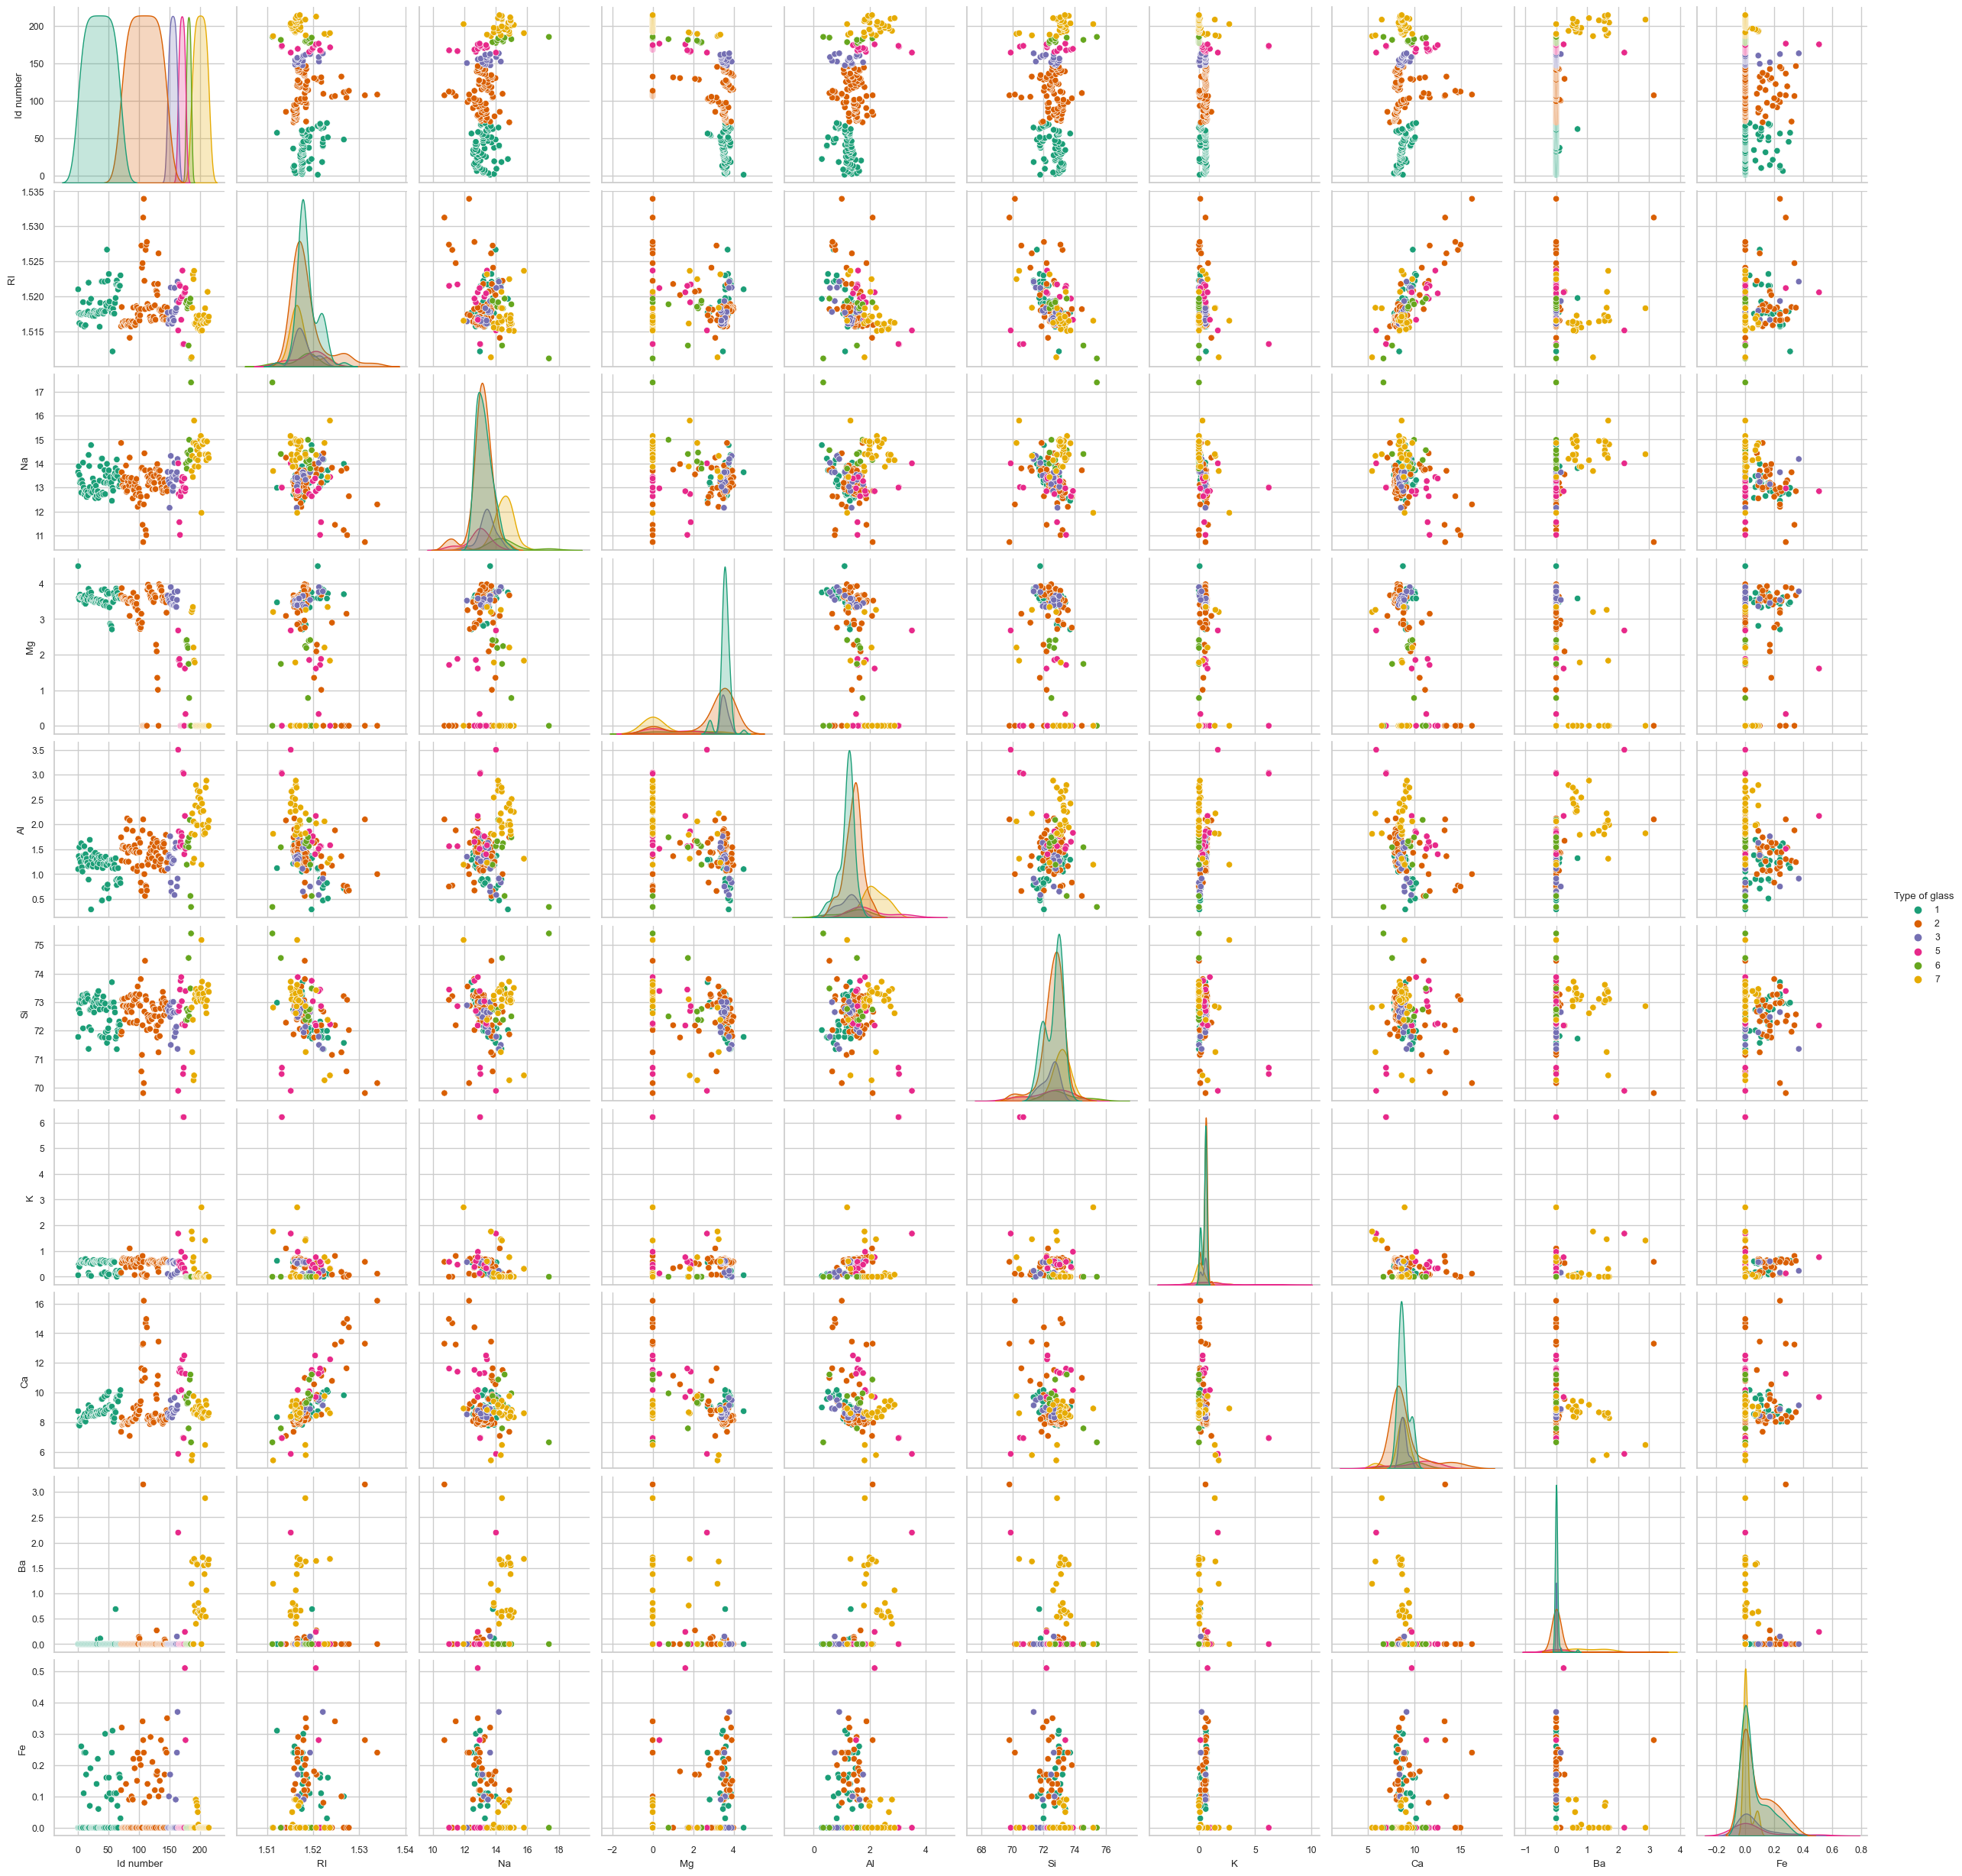

In [104]:
sns.pairplot(gl,hue='Type of glass',palette='Dark2')
plt.show()

Visualization through pairplot

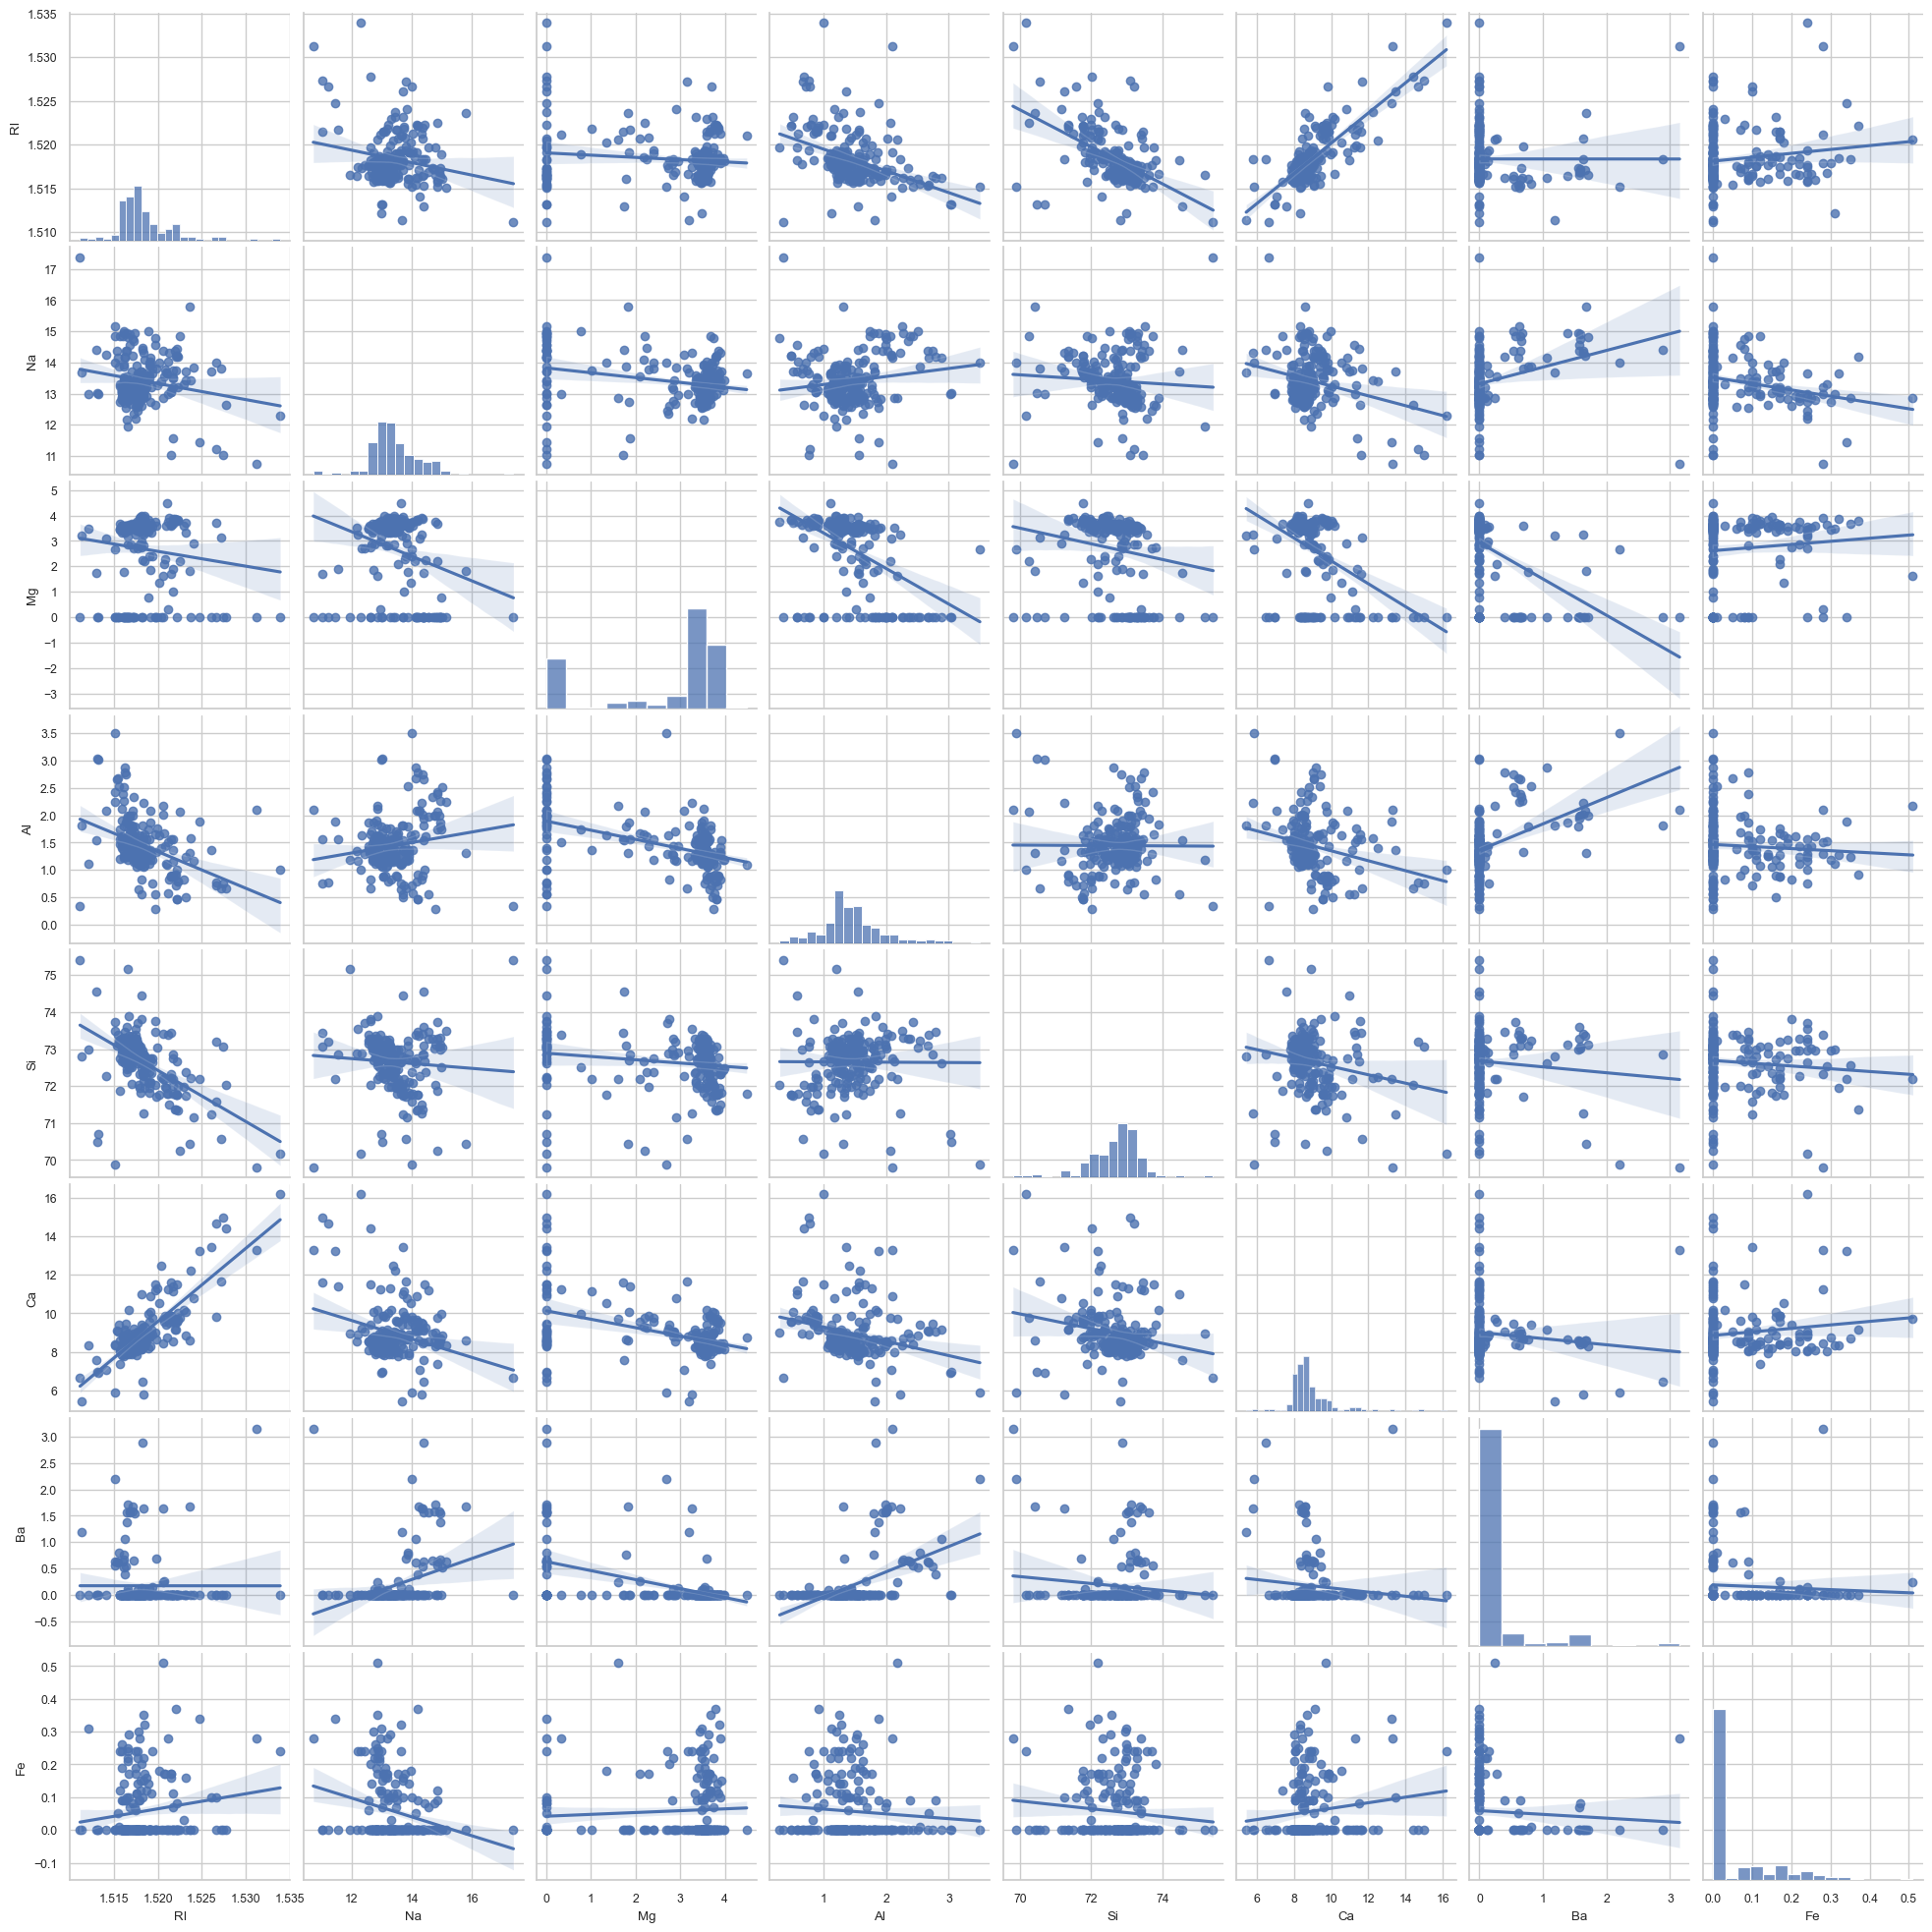

In [105]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(gl[['RI','Na','Mg','Al','Si','Ca','Ba','Fe']], kind='reg')

On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index.
Silica and RI seem to have an inverse relationship.

In [106]:
#checking skewness
gl.skew()

Id number        0.000000
RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64

In [107]:
x=gl.iloc[:,:-1]
y=gl.iloc[:,-1]

In [108]:
#removing skewness
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [109]:
#removing skewness from parch and sibsp column 
x['K']=np.cbrt(x['K'])
x['Ba']=np.cbrt(x['Ba'])
x['Ca']=np.cbrt(x['Ca'])
x['Fe']=np.cbrt(x['Fe'])

In [110]:
x.skew()

Id number    0.000000
RI           1.617843
Na           0.454181
Mg          -1.152559
Al          -0.002668
Si          -0.730447
K           -1.171248
Ca           0.896486
Ba           1.944859
Fe           0.874430
dtype: float64

In [111]:
#seperating independent and target variables
x=gl.drop('Type of glass',axis=1)
y=gl['Type of glass']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (214, 10)
label dimension (214,)


In [112]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(gl)
x

array([[-1.72397593,  0.87286765,  0.28495326, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-1.70778837, -0.24933347,  0.59181718, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-1.6916008 , -0.72131806,  0.14993314, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 1.6916008 ,  0.75404635,  1.16872135, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [ 1.70778837, -0.61239854,  1.19327046, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [ 1.72397593, -0.41436305,  1.00915211, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

# model buliding

In [113]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    Lr=LogisticRegression()
    Lr.fit(x_train,y_train)
    pre=Lr.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 1.0 at random state 193


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [115]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.9692307692307692
[[19  1  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  4  1  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.96      1.00      0.98        25
           3       1.00      1.00      1.00         3
           5       1.00      0.80      0.89         5
           6       0.80      1.00      0.89         4
           7       1.00      1.00      1.00         8

    accuracy                           0.97        65
   macro avg       0.96      0.96      0.96        65
weighted avg       0.97      0.97      0.97        65



accuracy score of decision tree is 96.92

In [117]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

1.0
[[20  0  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         8

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



accuracy score of random forest is 1.0

In [118]:
# Logistic regression
Lg=LogisticRegression()
Lg.fit(x_train,y_train)
prelg=Lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

1.0
[[20  0  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         8

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



accuracy score of logistic regression is 1.0

In [119]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.9076923076923077
[[20  0  0  0  0  0]
 [ 2 23  0  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  2  0  3  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        20
           2       0.85      0.92      0.88        25
           3       1.00      0.33      0.50         3
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         8

    accuracy                           0.91        65
   macro avg       0.96      0.81      0.85        65
weighted avg       0.92      0.91      0.90        65



accuarcy score of Svc is 90.76

In [120]:
# Ada boost classifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
preada=ada.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.8
[[19  1  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.66      1.00      0.79        25
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       1.00      1.00      1.00         8

    accuracy                           0.80        65
   macro avg       0.44      0.49      0.46        65
weighted avg       0.68      0.80      0.73        65



accuracy score of adaboost is 0.8

In [121]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

1.0
[[20  0  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         8

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



accuracy score of extra tree classifier is 1.0

# checking the cross validation

In [122]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.69767442 1.         1.         1.         0.92857143]
0.9252491694352158
0.11710197661161571
difference between accuracu score and cross validation 0.04398159979555338


cross validation score of decision tree is 0.9252491694352158

In [123]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.95348837 1.         1.         1.         1.        ]
0.9906976744186047
0.018604651162790687
difference between accuracy score and corss validation 0.009302325581395321


cross validation score of randomforest is 0.9906976744186047

In [124]:
# Cv score for logistic regression
score= cross_val_score(Lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.8372093  0.95348837 0.69767442 0.95348837 0.92857143]
0.8740863787375416
0.09803986148059486
difference between accuracy score and corss validation 0.12591362126245842


cross validation score of logistic regression is 0.8740863787375416

In [125]:
# Cv score for support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,presvc)-score.mean())

[0.81395349 0.95348837 0.74418605 0.90697674 0.88095238]
0.8599114064230342
0.0733743910231559
difference between accuracy score and cross validation 0.04778090126927348


cross validation score of svc is 0.8599114064230342

In [126]:
# Cv score for ada boost classifier
score= cross_val_score(ada,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.76744186 0.81395349 0.81395349 0.81395349 0.64285714]
0.7704318936877077
0.06628219211789642
difference between accuracy score and cross validation 0.2295681063122923


cross validation score of adaboost is 0.7704318936877077

In [127]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.95348837 1.         1.         1.         1.        ]
0.9906976744186047
0.018604651162790687
difference between accuracy score and cross validation 0.009302325581395321


cross validation score of extratree classifier is 0.9906976744186047

Extratress Classifier is our best model as the difference between accuracy score and cross validation score is least

# Setting paramaters

In [128]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [145]:
para={'criterion':['gini','entropy'],
     'n_estimators':[10,50,100],
     'min_samples_leaf':[1,2]}
ex_cv=GridSearchCV(ExtraTreesClassifier(),para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 100}


In [146]:
ex_new=ExtraTreesClassifier(criterion='gini',min_samples_leaf=1, n_estimators=100)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

1.0
93.84615384615384


In [147]:
#Saving the model
import joblib
import pickle
filename="Type of glass.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [148]:
#predicting the save model
model=pickle.load(open('Type of glass.pkl','rb'))

In [149]:
result=model.score(x_test,y_test)
print(result*100)

100.0


In [150]:
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
predicted,2,1,1,1,1,6,5,5,1,2,...,2,1,2,2,7,2,3,1,1,6
orginal,2,1,1,1,1,6,5,5,1,2,...,2,1,2,2,7,2,3,1,1,6
